# Multi-metric
-----------------------

This example shows how we can evaluate an ATOM pipeline on multiple metrics.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
# Call ATOM and run the pipeline using multipe metrics
# Note that for every step of the BO, both metrics are calculated, but only the first is used for optimization!
atom = ATOMClassifier(X, y, n_jobs=2, verbose=2, warnings=False, random_state=1)
atom.run(['MNB', 'QDA'], metric=('f1', 'recall'), n_calls=3, n_initial_points=1, bagging=4)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 2 cores.
Applying data cleaning...

Dataset stats ================= >>
Shape: (569, 31)
Scaled: False
----------------------------------
Train set size: 456
Test set size: 113
----------------------------------
Train set balance: 0:1 <==> 0.6:1.0
Test set balance: 0:1 <==> 0.7:1.0
----------------------------------
Instances in target per class:
|    |    total |    train_set |    test_set |
|---:|---------:|-------------:|------------:|
|  0 |      212 |          167 |          45 |
|  1 |      357 |          289 |          68 |


Running pipeline ============================= >>
Models in pipeline: MNB, QDA
Metric: f1, recall


Running BO for Multinomial Naive Bayes...
Random start 1 ----------------------------------
Parameters --> {'alpha': 1, 'fit_prior': True}
Evaluation --> f1: 0.9260  Best f1: 0.9260   recall: 0.9722  Best recall: 0.9722
Time iteration: 3.108s   Tota

## Analyze the results

In [4]:
# Note that some columns in the results dataframe now contain a list of scores,
# one for each metric, in the same order as you called them
atom.results[['metric_bo', 'metric_train', 'metric_test']]

,metric_bo,metric_train,metric_test
model,,,
MNB,"[0.9259597646215939, 0.9722323049001815]","[0.924342105263158, 0.972318339100346]","[0.9103448275862068, 0.9705882352941176]"
QDA,"[0.965402611638704, 0.9618874773139746]","[0.9828178694158075, 0.9896193771626297]","[0.9710144927536232, 0.9852941176470589]"


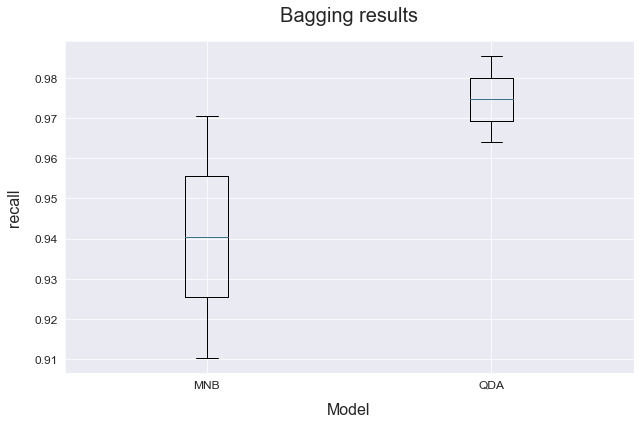

In [5]:
# Some plots allow us to choose the metric we want to show
atom.plot_bagging(metric='recall')